In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [2]:
data = np.load('data.npy')

In [3]:
target = np.load('target.npy')
target = tf.keras.utils.to_categorical(target) 
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

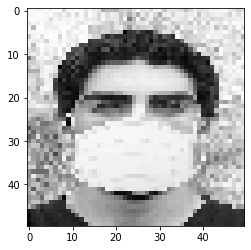

In [4]:
plt.imshow(data[890],cmap='gray')

In [5]:
target[890]

array([0., 1.], dtype=float32)

In [6]:

odata = data.copy()
ndata = []
for i in odata:
    image = i.reshape((*i.shape,1)) 
    image = tf.convert_to_tensor(image) 
    ndata.append(tf.image.grayscale_to_rgb(image).numpy()/255.)

data = ndata.copy()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
np.shape(data)

(1651, 50, 50, 3)

In [9]:
trainx, testx, trainy, testy = train_test_split(data,
                                                target,
                                                test_size=0.15,
                                                random_state=345,
                                                shuffle=True)

trainx = np.array(trainx)
testx = np.array(testx)

In [10]:
trainy.shape

(1403, 2)

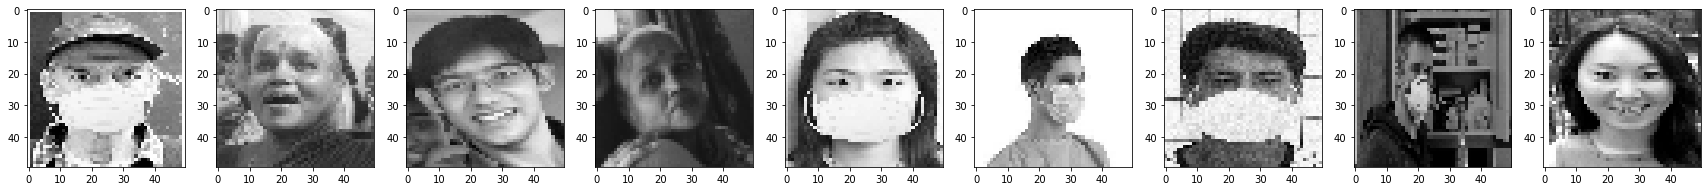

In [11]:
plt.figure(figsize=[30,30])
for i in np.arange(1,10):
    plt.subplot(int(f"19{i}"))
    plt.imshow(trainx[np.random.randint(0,1403)], cmap='gray')

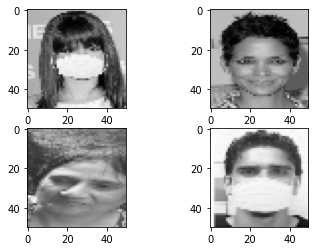

In [12]:
plt.subplot(221)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(222)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(223)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')
plt.subplot(224)
plt.imshow(trainx[np.random.randint(0,1440)], cmap='gray')

In [13]:
trainy[0]

array([0., 1.], dtype=float32)

In [14]:
img_shape = trainx[0].shape
img_shape  

(50, 50, 3)

In [15]:
model=Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=img_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories


adam = tf.keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation (Activation)      (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
activation_1 (Activation)    (None, 9, 9, 128)         0

In [17]:
history = model.fit(x=trainx,
                    y=trainy,
                    batch_size=100,
                    epochs=50,
                    validation_split=0.2,
                    verbose=2,
                    shuffle=True)

Epoch 1/50
12/12 - 7s - loss: 0.6826 - accuracy: 0.5330 - val_loss: 0.6531 - val_accuracy: 0.5409
Epoch 2/50
12/12 - 5s - loss: 0.6282 - accuracy: 0.6373 - val_loss: 0.5264 - val_accuracy: 0.8399
Epoch 3/50
12/12 - 5s - loss: 0.5121 - accuracy: 0.7629 - val_loss: 0.4125 - val_accuracy: 0.8114
Epoch 4/50
12/12 - 5s - loss: 0.3808 - accuracy: 0.8494 - val_loss: 0.2820 - val_accuracy: 0.8826
Epoch 5/50
12/12 - 6s - loss: 0.2631 - accuracy: 0.9135 - val_loss: 0.3746 - val_accuracy: 0.8541
Epoch 6/50
12/12 - 5s - loss: 0.2859 - accuracy: 0.8922 - val_loss: 0.2247 - val_accuracy: 0.9039
Epoch 7/50
12/12 - 5s - loss: 0.2220 - accuracy: 0.9180 - val_loss: 0.1634 - val_accuracy: 0.9466
Epoch 8/50
12/12 - 5s - loss: 0.1795 - accuracy: 0.9278 - val_loss: 0.1249 - val_accuracy: 0.9537
Epoch 9/50
12/12 - 5s - loss: 0.1718 - accuracy: 0.9403 - val_loss: 0.1724 - val_accuracy: 0.9466
Epoch 10/50
12/12 - 5s - loss: 0.1238 - accuracy: 0.9554 - val_loss: 0.1089 - val_accuracy: 0.9609
Epoch 11/50
12/12 -

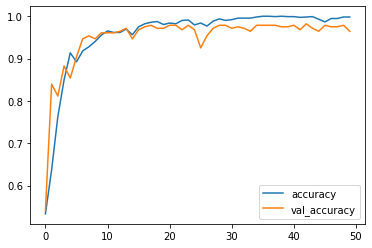

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])

In [19]:
model.evaluate(testx, testy)

8/8 [==============================] - 0s 32ms/step - loss: 0.2239 - accuracy: 0.9435


[0.2238740473985672, 0.9435483813285828]

In [20]:
model.save('cnn.h5')